<a href="https://colab.research.google.com/github/reysilvaa/PCVK/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Structuring Element (Cross 3x3):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


(-0.5, 299.5, 261.5, -0.5)

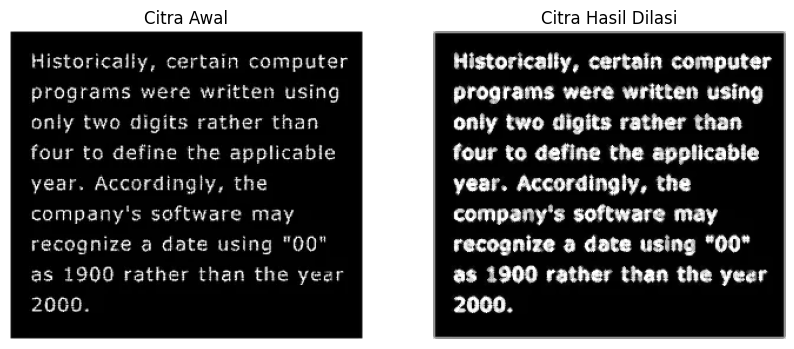

In [24]:
# Define the structuring element (SED) - 3x3 cross
structuring_element = np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]])

print("Structuring Element (Cross 3x3):")
print(structuring_element)

def dilation(image, struct_element):
    # Get dimensions of the image and structuring element
    img_h, img_w = image.shape
    se_h, se_w = struct_element.shape
    pad_h, pad_w = se_h // 2, se_w // 2

    # Create a padded version of the image to apply dilation at borders
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Prepare the output image
    dilated_image = np.zeros_like(image)

    # Perform dilation
    for i in range(pad_h, img_h + pad_h):
        for j in range(pad_w, img_w + pad_w):
            # Extract the region of interest (ROI)
            roi = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

            # Apply dilation (max value where structuring element is 1)
            dilated_image[i - pad_h, j - pad_w] = np.max(roi[struct_element == 1])

    return dilated_image


# Apply the dilation function
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Assets/morphology.png', cv2.IMREAD_GRAYSCALE)
dilated_image = dilation(image, structuring_element)

# Plot the original and dilated images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')


Structuring Element (Cross 3x3):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


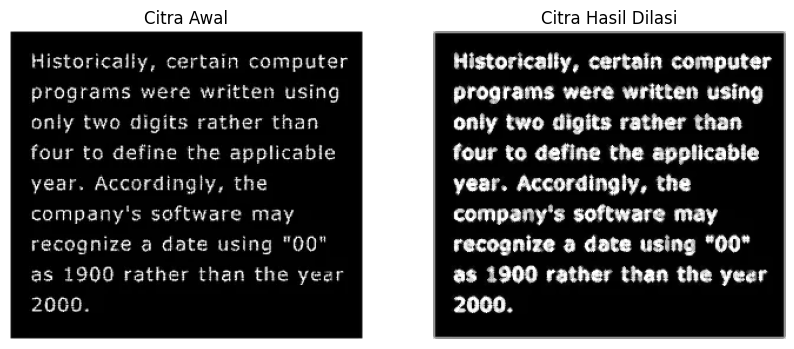

In [23]:
# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Assets/morphology.png', cv2.IMREAD_GRAYSCALE)

# Mendefinisikan Structuring Element (SED) - Cross 3x3 menggunakan OpenCV
structuring_element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Mencetak Structuring Element
print("Structuring Element (Cross 3x3):")
print(structuring_element)

# Melakukan dilasi menggunakan fungsi morphologyEx OpenCV
dilated_image = cv2.morphologyEx(image, cv2.MORPH_DILATE, structuring_element)

# Menampilkan gambar asli dan citra hasil dilasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()


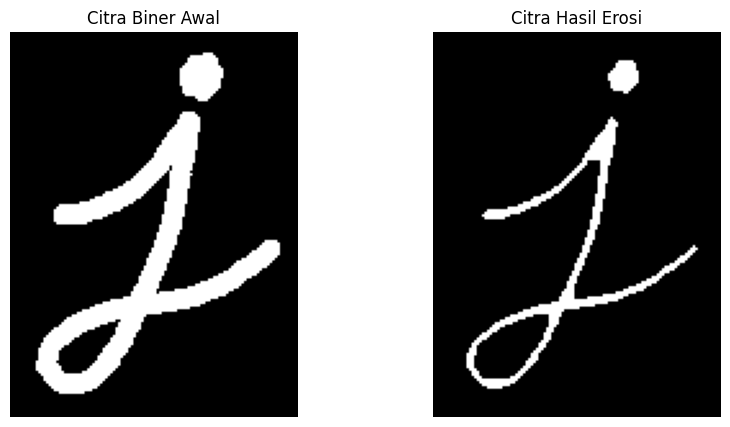

In [28]:
def erosi(image, structuring_element):
    # Dapatkan dimensi citra dan elemen struktural
    img_h, img_w = image.shape
    se_h, se_w = structuring_element.shape
    pad_h, pad_w = se_h // 2, se_w // 2

    # Buat citra hasil erosi
    eroded_image = np.zeros_like(image)

    # Lakukan erosi
    for i in range(pad_h, img_h - pad_h):
        for j in range(pad_w, img_w - pad_w):
            # Ambil region of interest (ROI)
            roi = image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

            # Erosi: semua piksel di ROI harus 255 (putih)
            if np.all(roi[structuring_element == 1] == 255):
                eroded_image[i, j] = 255  # Set piksel hasil menjadi putih
            else:
                eroded_image[i, j] = 0    # Set piksel hasil menjadi hitam

    return eroded_image

# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Assets/j.png', cv2.IMREAD_GRAYSCALE)

# Mengonversi gambar menjadi biner (0 dan 255)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element (SE) - Square 5x5
structuring_element = np.ones((5, 5), dtype=np.uint8)

# Melakukan erosi
eroded_image = erosi(binary_image, structuring_element)

# Menampilkan gambar asli dan citra hasil erosi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()


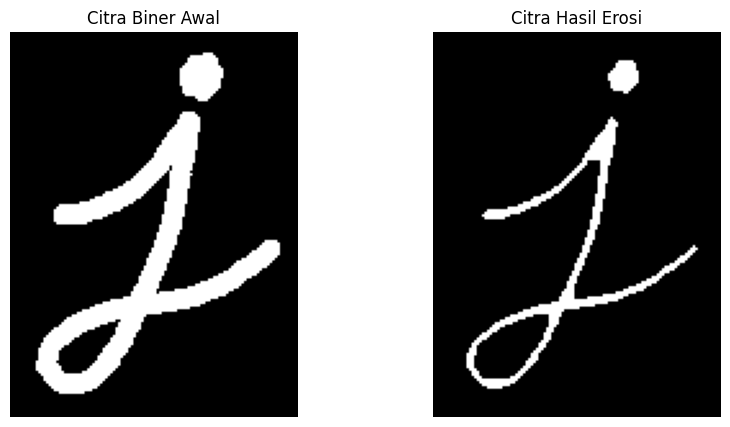

In [29]:
# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Assets/j.png', cv2.IMREAD_GRAYSCALE)

# Mengonversi gambar menjadi biner (0 dan 255)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element (SE) - Square 5x5
structuring_element = np.ones((5, 5), dtype=np.uint8)

# Melakukan erosi menggunakan OpenCV
eroded_image = cv2.erode(binary_image, structuring_element)

# Menampilkan gambar asli dan citra hasil erosi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()


# **implementasi operasi opening**

### **Tanpa Library OpenCV**

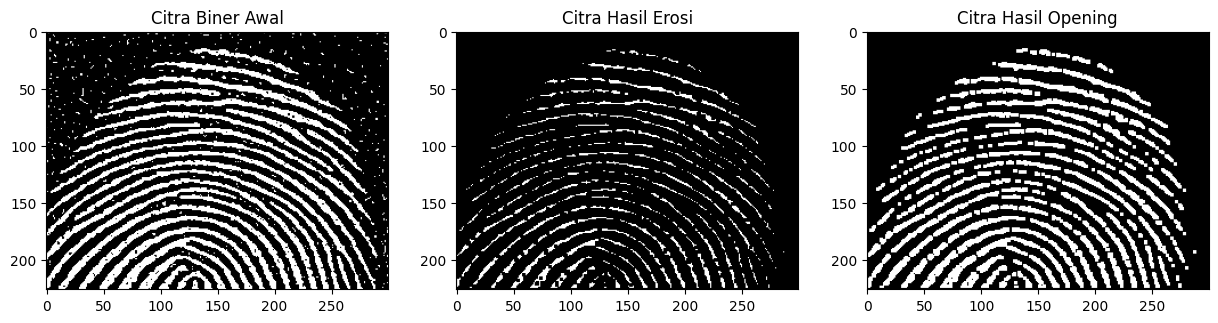

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def erosi(image, structuring_element):
    # Dapatkan dimensi citra dan elemen struktural
    img_h, img_w = image.shape
    se_h, se_w = structuring_element.shape
    pad_h, pad_w = se_h // 2, se_w // 2

    # Buat citra hasil erosi
    eroded_image = np.zeros_like(image)

    # Lakukan erosi
    for i in range(pad_h, img_h - pad_h):
        for j in range(pad_w, img_w - pad_w):
            # Ambil region of interest (ROI)
            roi = image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

            # Erosi: semua piksel di ROI harus 255 (putih)
            if np.all(roi[structuring_element == 1] == 255):
                eroded_image[i, j] = 255  # Set piksel hasil menjadi putih
            else:
                eroded_image[i, j] = 0    # Set piksel hasil menjadi hitam

    return eroded_image

def dilasi(image, structuring_element):
    # Dapatkan dimensi citra dan elemen struktural
    img_h, img_w = image.shape
    se_h, se_w = structuring_element.shape
    pad_h, pad_w = se_h // 2, se_w // 2

    # Buat citra hasil dilasi
    dilated_image = np.zeros_like(image)

    # Lakukan dilasi
    for i in range(pad_h, img_h - pad_h):
        for j in range(pad_w, img_w - pad_w):
            # Ambil region of interest (ROI)
            roi = image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

            # Dilasi: ambil nilai maksimum di ROI
            dilated_image[i, j] = np.max(roi[structuring_element == 1])

    return dilated_image

# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Assets/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Mengonversi gambar menjadi biner (0 dan 255)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element (SE) - Square 3x3
structuring_element = np.ones((3, 3), dtype=np.uint8)

# Melakukan opening (Erosi diikuti oleh Dilasi)
eroded_image = erosi(binary_image, structuring_element)
opened_image = dilasi(eroded_image, structuring_element)

# Menampilkan gambar asli dan citra hasil opening
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner Awal')
plt.axis('on')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis('on')

plt.show()


### **Dengan Library OpenCV**

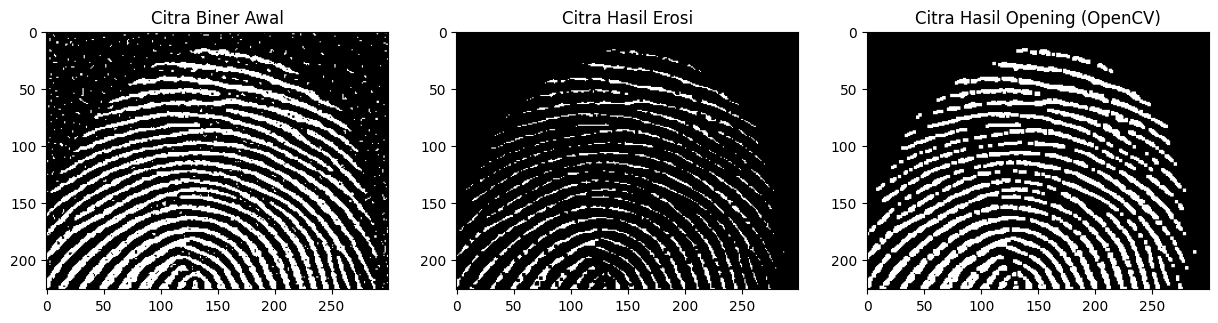

In [37]:
# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Assets/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Mengonversi gambar menjadi biner (0 dan 255)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element (SE) - Square 3x3
structuring_element = np.ones((3, 3), dtype=np.uint8)

# Melakukan erosi menggunakan OpenCV
eroded_image = cv2.erode(binary_image, structuring_element)

# Melakukan opening menggunakan OpenCV
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, structuring_element)

# Menampilkan gambar asli, hasil erosi, dan citra hasil opening
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner Awal')
plt.axis('on')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Citra Hasil Opening (OpenCV)')
plt.axis('on')

plt.show()


# **Implementasi operasi closing**

### **Tanpa Library OpenCV**

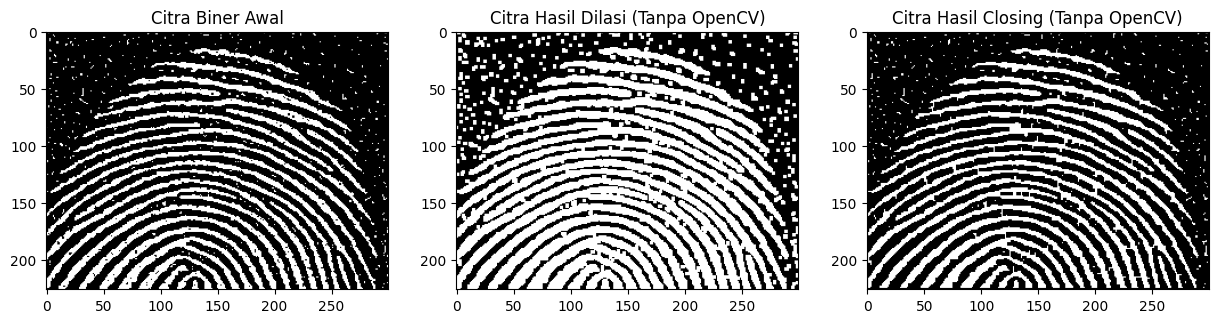

In [40]:
def dilasi(image, structuring_element):
    img_h, img_w = image.shape
    se_h, se_w = structuring_element.shape
    pad_h, pad_w = se_h // 2, se_w // 2
    dilated_image = np.zeros_like(image)

    padded_image = np.pad(image, pad_width=pad_h, mode='constant', constant_values=0)

    for i in range(pad_h, img_h + pad_h):
        for j in range(pad_w, img_w + pad_w):
            window = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            dilated_image[i - pad_h, j - pad_w] = np.max(window[structuring_element == 1])

    return dilated_image

def erosi(image, structuring_element):
    img_h, img_w = image.shape
    se_h, se_w = structuring_element.shape
    pad_h, pad_w = se_h // 2, se_w // 2
    eroded_image = np.zeros_like(image)

    padded_image = np.pad(image, pad_width=pad_h, mode='constant', constant_values=1)

    for i in range(pad_h, img_h + pad_h):
        for j in range(pad_w, img_w + pad_w):
            window = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            eroded_image[i - pad_h, j - pad_w] = np.min(window[structuring_element == 1])

    return eroded_image

def closing(image, structuring_element):
    dilated = dilasi(image, structuring_element)
    closed_image = erosi(dilated, structuring_element)
    return dilated, closed_image  # Kembalikan citra dilasi dan hasil closing

# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Assets/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Mengonversi gambar menjadi biner (0 dan 255)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element (SE) - Square 3x3
structuring_element = np.ones((3, 3), dtype=np.uint8)

# Melakukan closing
dilated_image, closed_image = closing(binary_image, structuring_element)

# Menampilkan gambar asli dan citra hasil dilasi dan closing
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner Awal')
plt.axis('on')

plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi (Tanpa OpenCV)')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(closed_image, cmap='gray')
plt.title('Citra Hasil Closing (Tanpa OpenCV)')
plt.axis('on')

plt.show()


### **Dengan Library OpenCV**

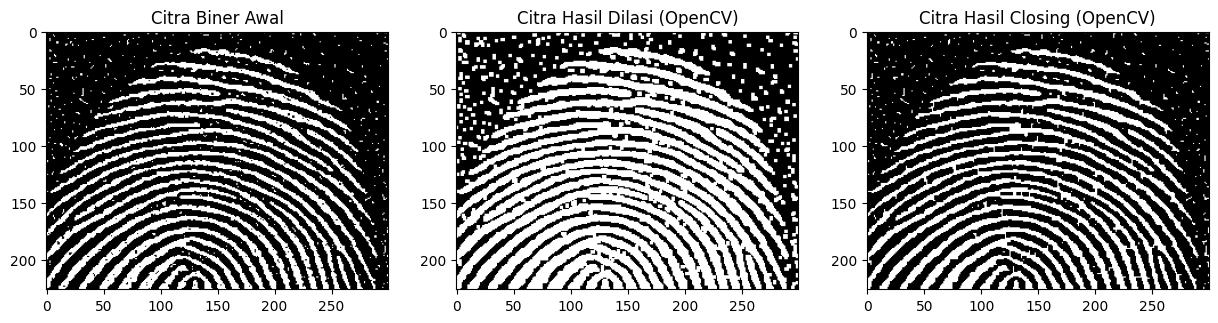

In [42]:
# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Assets/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Mengonversi gambar menjadi biner (0 dan 255)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element (SE) - Square 3x3
structuring_element = np.ones((3, 3), dtype=np.uint8)

# Melakukan dilasi menggunakan OpenCV
dilated_image_cv = cv2.dilate(binary_image, structuring_element)

# Melakukan closing menggunakan OpenCV
closed_image_cv = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, structuring_element)

# Menampilkan gambar asli, hasil dilasi, dan hasil closing dengan OpenCV
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner Awal')
plt.axis('on')

plt.subplot(1, 3, 2)
plt.imshow(dilated_image_cv, cmap='gray')
plt.title('Citra Hasil Dilasi (OpenCV)')
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(closed_image_cv, cmap='gray')
plt.title('Citra Hasil Closing (OpenCV)')
plt.axis('on')

plt.show()


SED: Cross 3


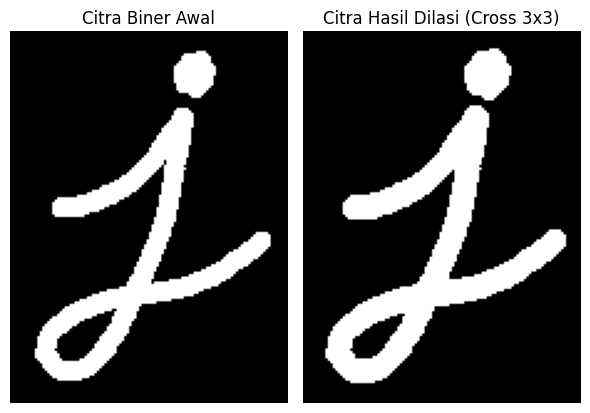

SED: Cross 5


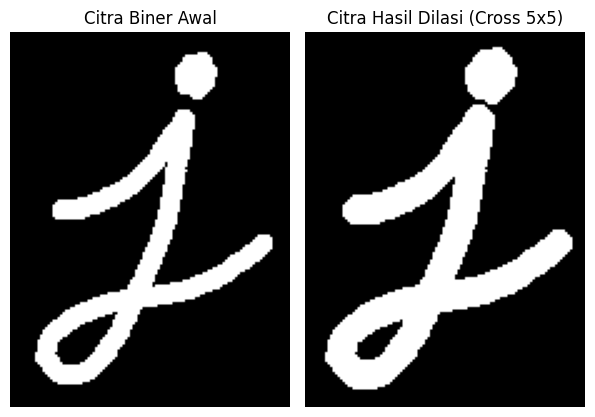

In [66]:
# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Assets/j.png', cv2.IMREAD_GRAYSCALE)

# Mengonversi gambar menjadi biner (0 dan 255)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element Cross 3x3
structuring_element_3x3 = np.array([[0, 1, 0],
                                     [1, 1, 1],
                                     [0, 1, 0]], dtype=np.uint8)

# Mendefinisikan Structuring Element Cross 5x5
structuring_element_5x5 = np.array([[0, 0, 1, 0, 0],
                                     [0, 0, 1, 0, 0],
                                     [1, 1, 1, 1, 1],
                                     [0, 0, 1, 0, 0],
                                     [0, 0, 1, 0, 0]], dtype=np.uint8)

# Melakukan dilasi menggunakan OpenCV
dilated_image_3x3 = cv2.dilate(binary_image, structuring_element_3x3)
dilated_image_5x5 = cv2.dilate(binary_image, structuring_element_5x5)

# Menampilkan gambar
plt.figure(figsize=(6, 7))

# Menampilkan citra biner awal
print("SED: Cross 3")
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner Awal')
plt.axis('off')

# Menampilkan citra hasil dilasi (Cross 3x3)
plt.subplot(1, 2, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Citra Hasil Dilasi (Cross 3x3)')
plt.axis('off')

plt.tight_layout()  # Mengatur layout agar tidak saling bertumpuk
plt.show()

plt.figure(figsize=(9, 7))
print("SED: Cross 5")
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner Awal')
plt.axis('off')

# Menampilkan citra biner awal (ketiga kali)
plt.subplot(1, 3, 2)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Citra Hasil Dilasi (Cross 5x5)')
plt.axis('off')

plt.tight_layout()  # Mengatur layout agar tidak saling bertumpuk
plt.show()


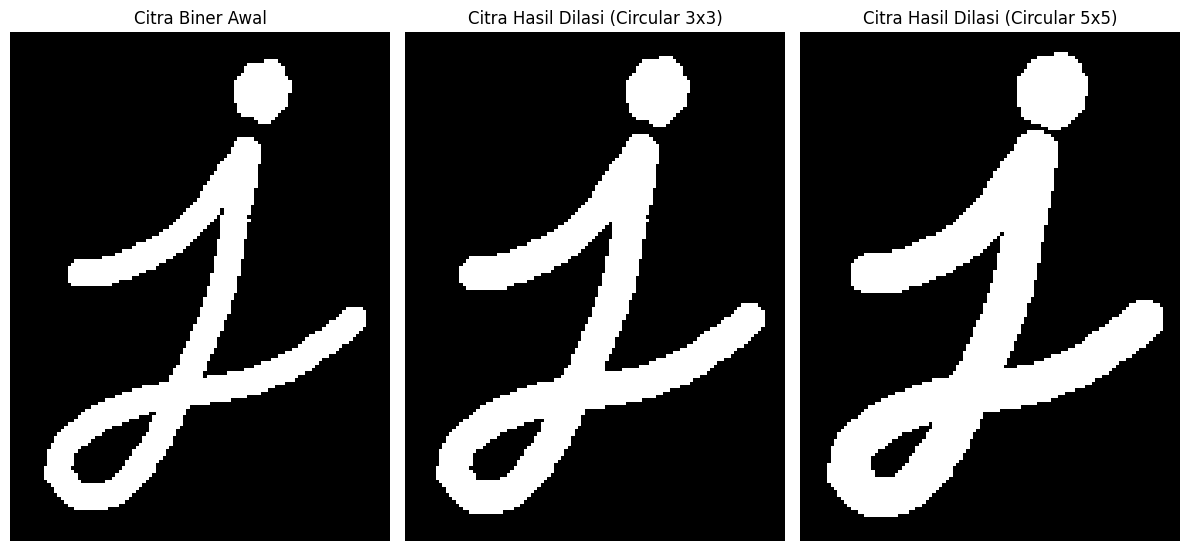

In [69]:
# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Assets/j.png', cv2.IMREAD_GRAYSCALE)

# Mengonversi gambar menjadi biner (0 dan 255)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element Circular 3x3 dan 5x5
structuring_element_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
structuring_element_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Melakukan dilasi menggunakan OpenCV
dilated_image_3x3 = cv2.dilate(binary_image, structuring_element_3x3)
dilated_image_5x5 = cv2.dilate(binary_image, structuring_element_5x5)

# Menampilkan gambar
plt.figure(figsize=(12, 8))

# Menampilkan citra biner awal
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner Awal')
plt.axis('off')

# Menampilkan citra hasil dilasi (Circular 3x3)
plt.subplot(1, 3, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Citra Hasil Dilasi (Circular 3x3)')
plt.axis('off')

# Menampilkan citra hasil dilasi (Circular 5x5)
plt.subplot(1, 3, 3)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Citra Hasil Dilasi (Circular 5x5)')
plt.axis('off')

plt.tight_layout()  # Mengatur layout agar tidak saling bertumpuk
plt.show()


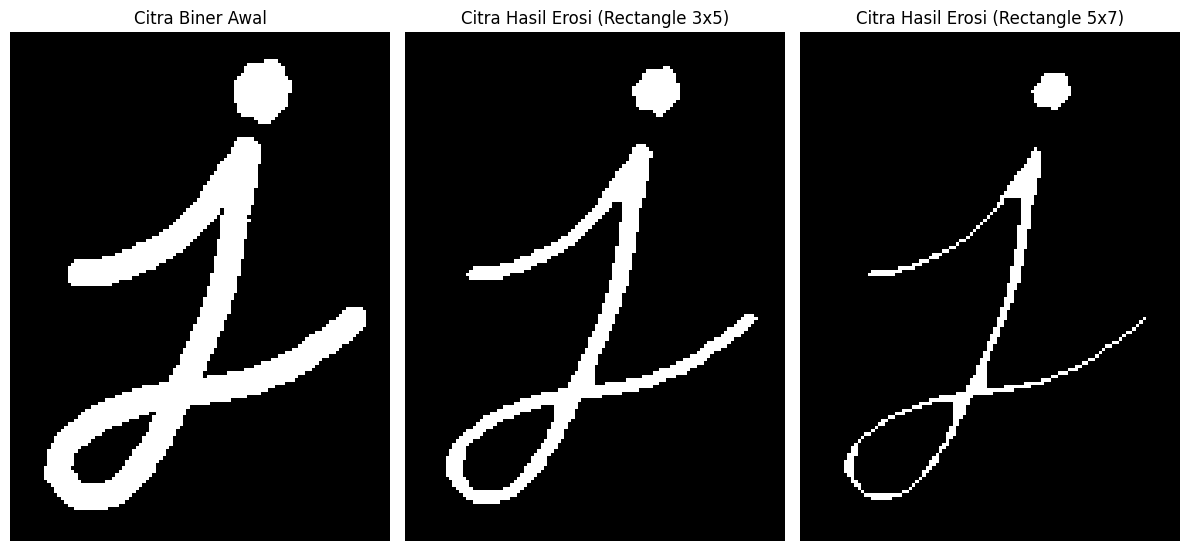

In [75]:
# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Assets/j.png', cv2.IMREAD_GRAYSCALE)

# Mengonversi gambar menjadi biner (0 dan 255)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element Rectangle 3x5 dan 5x7
structuring_element_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
structuring_element_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

# Melakukan erosi menggunakan OpenCV
eroded_image_3x5 = cv2.erode(binary_image, structuring_element_3x5)
eroded_image_5x7 = cv2.erode(binary_image, structuring_element_5x7)

# Menampilkan gambar
plt.figure(figsize=(12, 8))

# Menampilkan citra biner awal
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner Awal')
plt.axis('off')

# Menampilkan citra hasil erosi (Rectangle 3x5)
plt.subplot(1, 3, 2)
plt.imshow(eroded_image_3x5, cmap='gray')
plt.title('Citra Hasil Erosi (Rectangle 3x5)')
plt.axis('off')

# Menampilkan citra hasil erosi (Rectangle 5x7)
plt.subplot(1, 3, 3)
plt.imshow(eroded_image_5x7, cmap='gray')
plt.title('Citra Hasil Erosi (Rectangle 5x7)')
plt.axis('off')

plt.tight_layout()  # Mengatur layout agar tidak saling bertumpuk
plt.show()


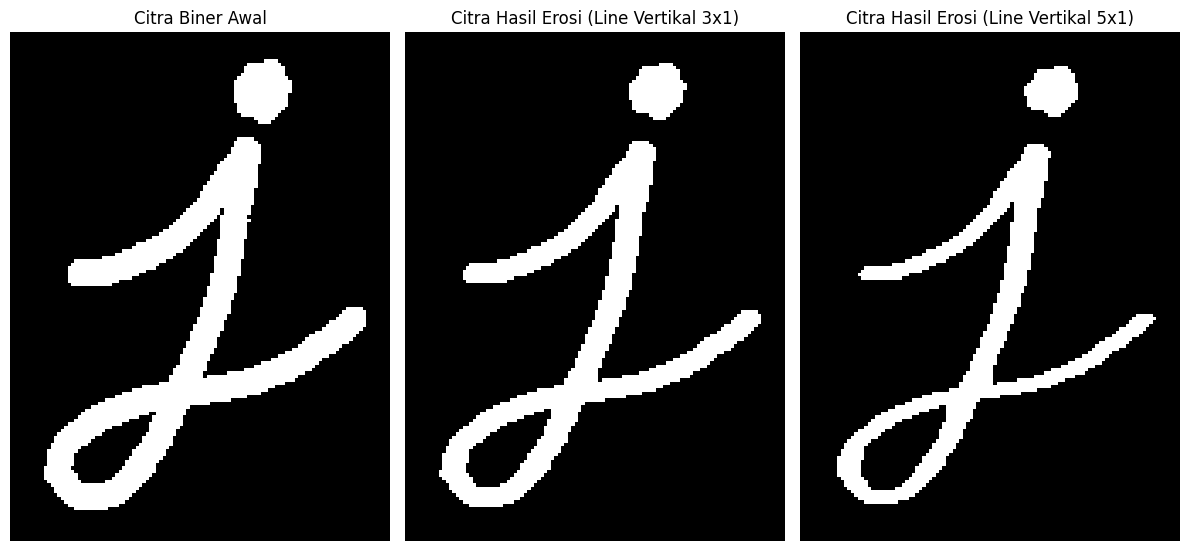

In [76]:
# Membaca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Assets/j.png', cv2.IMREAD_GRAYSCALE)

# Mengonversi gambar menjadi biner (0 dan 255)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Mendefinisikan Structuring Element Line Vertikal 3x1 dan 5x1 menggunakan cv2
structuring_element_3x1 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))  # Line Vertikal 3x1
structuring_element_5x1 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))  # Line Vertikal 5x1

# Melakukan erosi menggunakan OpenCV
eroded_image_3x1 = cv2.erode(binary_image, structuring_element_3x1)
eroded_image_5x1 = cv2.erode(binary_image, structuring_element_5x1)

# Menampilkan gambar
plt.figure(figsize=(12, 8))

# Menampilkan citra biner awal
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner Awal')
plt.axis('off')

# Menampilkan citra hasil erosi (Line Vertikal 3x1)
plt.subplot(1, 3, 2)
plt.imshow(eroded_image_3x1, cmap='gray')
plt.title('Citra Hasil Erosi (Line Vertikal 3x1)')
plt.axis('off')

# Menampilkan citra hasil erosi (Line Vertikal 5x1)
plt.subplot(1, 3, 3)
plt.imshow(eroded_image_5x1, cmap='gray')
plt.title('Citra Hasil Erosi (Line Vertikal 5x1)')
plt.axis('off')

plt.tight_layout()  # Mengatur layout agar tidak saling bertumpuk
plt.show()
